In [10]:
import ml
import pandas as pd
import geo
import most_common_names
import wordle
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Machine Learning Visualizations/Training
* This portion of the Notebook details how the ML model was trained as well as the visualizations of training/validation accuracy for the model that uses titles and authors as parameters versus the model that uses titles only as parameters.

In [3]:
# Load the training data and test data
pd_train = pd.read_csv('../Datasets/train.csv')
pd_train = pd_train.fillna('')
pd_train['total'] = pd_train['title'] + ' ' + pd_train['author']

# Pandas dataframe of the testing data 
pd_test = pd.read_csv('../Datasets/test.csv')
pd_test = pd_test.fillna('')
pd_test['total'] = pd_test['title'] + ' ' + pd_test['author']

training_labels = pd_train['label'].to_numpy() # the labels of each training item 
pd_train

,id,title,author,text,label,total
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \r\nAn Iranian woman has been sentenced ...,1,Iranian woman jailed for fictional unpublished...
...,...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0,Rapper T.I.: Trump a ’Poster Child For White S...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0,"N.F.L. Playoffs: Schedule, Matchups and Odds -..."
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0,Macy’s Is Said to Receive Takeover Approach by...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [4]:
# Pre-process all the text from the title and authors and save them into new Dataframe
cleaned_data = ml.process_data(pd_train, 'total')
cleaned_test_data = ml.process_data(pd_test, 'total')
cleaned_train_titles = ml.process_data(pd_train, 'title')

# Create training/test data
training_data = ml.create_ml_data(cleaned_data)
title_training_data = ml.create_ml_data(cleaned_train_titles)

Epoch 1/25
218/218 [==============================] - 10s 44ms/step - loss: 0.1619 - accuracy: 0.9312 - val_loss: 0.0450 - val_accuracy: 0.9876
Epoch 2/25
218/218 [==============================] - 11s 49ms/step - loss: 0.0147 - accuracy: 0.9954 - val_loss: 0.0415 - val_accuracy: 0.9891
Epoch 3/25
218/218 [==============================] - 10s 48ms/step - loss: 0.0040 - accuracy: 0.9991 - val_loss: 0.0454 - val_accuracy: 0.9889
Epoch 4/25
218/218 [==============================] - 10s 46ms/step - loss: 0.0024 - accuracy: 0.9992 - val_loss: 0.0549 - val_accuracy: 0.9860
Epoch 5/25
218/218 [==============================] - 9s 43ms/step - loss: 0.0032 - accuracy: 0.9991 - val_loss: 0.0632 - val_accuracy: 0.9869
Epoch 6/25
218/218 [==============================] - 10s 44ms/step - loss: 5.3119e-04 - accuracy: 0.9999 - val_loss: 0.0644 - val_accuracy: 0.9882
Epoch 7/25
218/218 [==============================] - 10s 44ms/step - loss: 1.0629e-04 - accuracy: 1.0000 - val_loss: 0.0733 - val_ac

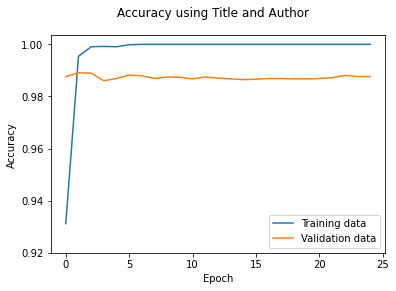

In [4]:
# Train and plot the validation/training accuracy for the ML model
# using title and author as parameters 
train_model = ml.run_ml_model(training_data, training_labels)
ml.plot_model(train_model)

Epoch 1/25
218/218 [==============================] - 9s 42ms/step - loss: 0.2675 - accuracy: 0.8898 - val_loss: 0.1931 - val_accuracy: 0.9212
Epoch 2/25
218/218 [==============================] - 9s 42ms/step - loss: 0.1295 - accuracy: 0.9516 - val_loss: 0.1975 - val_accuracy: 0.9168
Epoch 3/25
218/218 [==============================] - 9s 42ms/step - loss: 0.0885 - accuracy: 0.9685 - val_loss: 0.2322 - val_accuracy: 0.9116
Epoch 4/25
218/218 [==============================] - 9s 42ms/step - loss: 0.0572 - accuracy: 0.9803 - val_loss: 0.2649 - val_accuracy: 0.9180
Epoch 5/25
218/218 [==============================] - 9s 42ms/step - loss: 0.0303 - accuracy: 0.9907 - val_loss: 0.3529 - val_accuracy: 0.9126
Epoch 6/25
218/218 [==============================] - 9s 42ms/step - loss: 0.0212 - accuracy: 0.9924 - val_loss: 0.4165 - val_accuracy: 0.9160
Epoch 7/25
218/218 [==============================] - 9s 42ms/step - loss: 0.0205 - accuracy: 0.9930 - val_loss: 0.4852 - val_accuracy: 0.9122

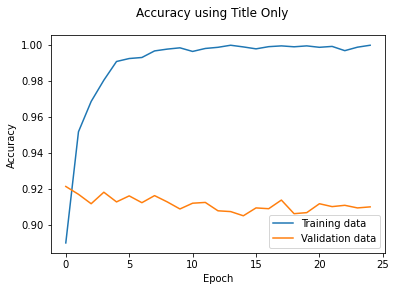

In [5]:
# Train the LSTM model that only uses the title as a parameter
title_model = ml.run_ml_model(title_training_data, training_labels)
ml.plot_model(title_model)

# Fake/Real News Map Visualizations
* Featured here are some visualizations of the amount of Fake News in different countries across the globe. 

In [12]:
# Create geopandas dataframe
world = geo.create_world('../Datasets/train.csv', '../Datasets/test.csv')

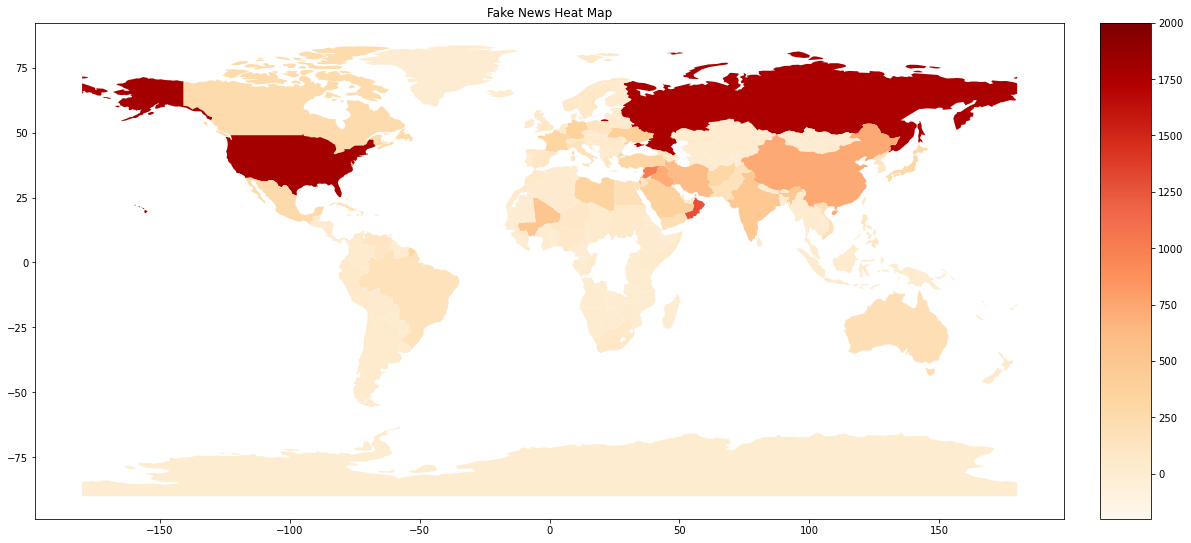

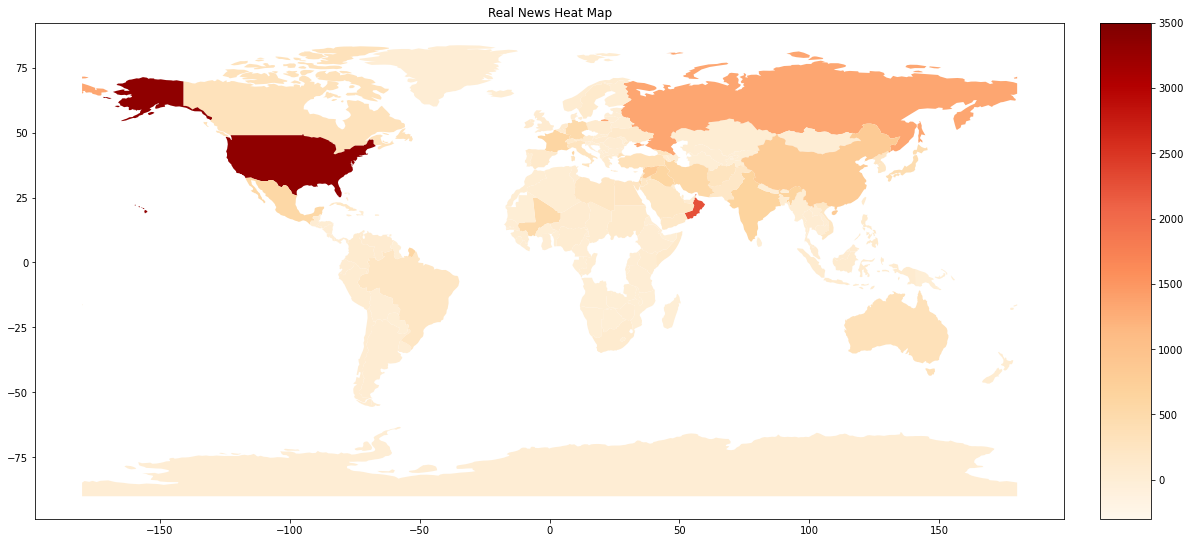

In [13]:
# Plot results
fig, ax = plt.subplots(1, 1)
plt.title("Fake News Heat Map")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.5)
world.plot(column='Mentions_Fake', cmap = 'OrRd', ax=ax, legend=True, cax = cax, vmin = -200, vmax = 2000)
fig.set_size_inches(20, 15)
#plt.savefig('fake_world.jpeg')

fig2, ax2 = plt.subplots(1, 1)
plt.title("Real News Heat Map")
divider = make_axes_locatable(ax2)
cax2 = divider.append_axes("right", size="5%", pad=0.5)
world.plot(column='Mentions_Real', cmap = 'OrRd', ax=ax2, legend=True, cax = cax2, vmin = -300, vmax = 3500)
fig2.set_size_inches(20, 15)
#plt.savefig('real_world.jpeg')

# Bar Graph Visualizations of Most Common Names 
* In this section, some bar graphs will display the most common names used in fake and real news

In [2]:
# read from file to build the figures
real_data = pd.read_csv('../Datasets/real_name.csv')
real_name = most_common_names.merge_real_names(real_data['name'].to_list())
# print(len(real_name))

fake_data = pd.read_csv('../Datasets/fake_name.csv')
fake_name = most_common_names.merge_fake_names(fake_data['name'].to_list())
# print(len(fake_name))

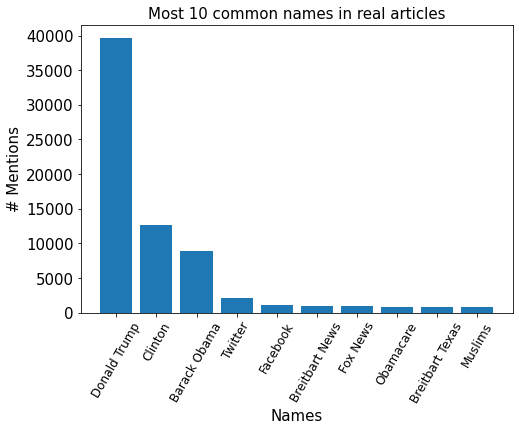

In [3]:
common_real_name = most_common_names.get_common_name(real_name, 1000)
most_common_names.most_commom_names_bar(common_real_name, 10, 'real')

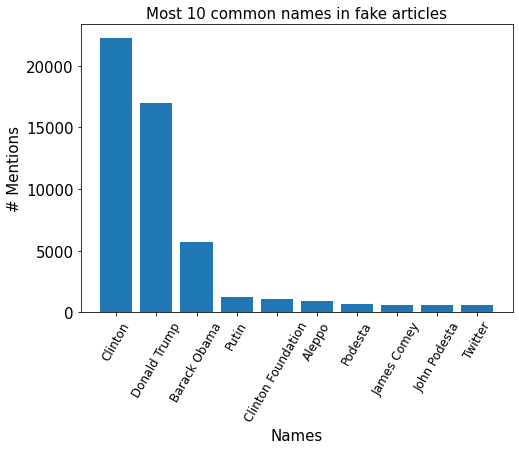

In [4]:
common_fake_name = most_common_names.get_common_name(fake_name, 1000)
most_common_names.most_commom_names_bar(common_fake_name, 10, 'fake')

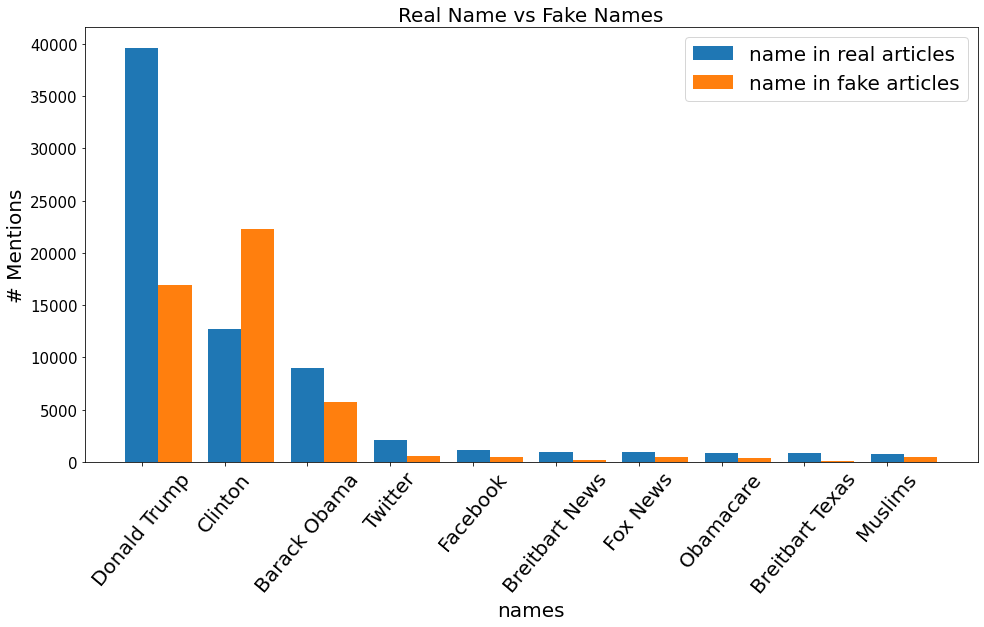

In [6]:
most_common_names.comparison_barchart(common_real_name, common_fake_name)

# Wordle Visualizations
* Now, let's see the most common words/names used in fake news and visualize it in a Wordle. 

In [11]:
# Read the data containing all articles that 
# are fake/real separately
fake_data = pd.read_csv('../Datasets/new1.csv')
fake_data = fake_data.dropna(subset=['text'])
real_news = pd.read_csv('../Datasets/new0.csv')
real_news = real_news.dropna(subset=['text'])

In [12]:
# Aggregate all the fake news text and real news text into 
# one big string that will be used for the wordle 
fake_data['text'] = fake_data['text'].apply(wordle.remove_stop_words)
real_news['text'] = real_news['text'].apply(wordle.remove_stop_words)

fake_string = fake_data['text'].agg(['sum'])
real_string = real_news['text'].agg(['sum'])

real = real_string['sum']
fake = fake_string['sum']

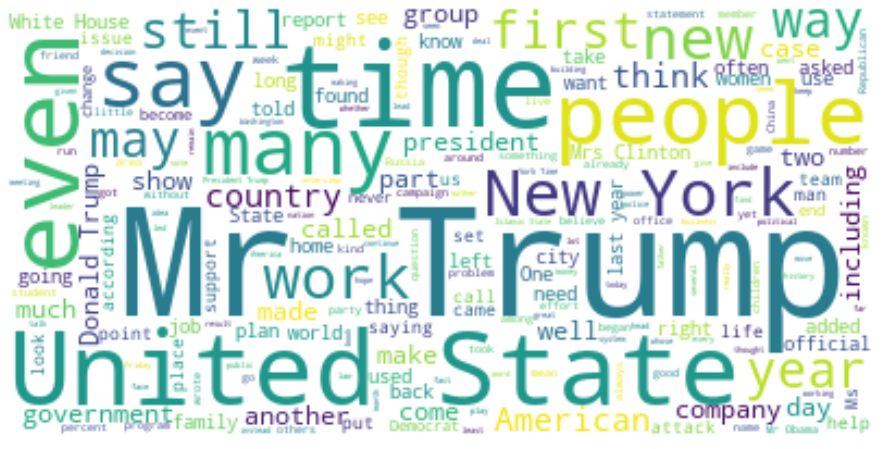

In [13]:
wordle.word_cloud(real, "real_wordle.png")

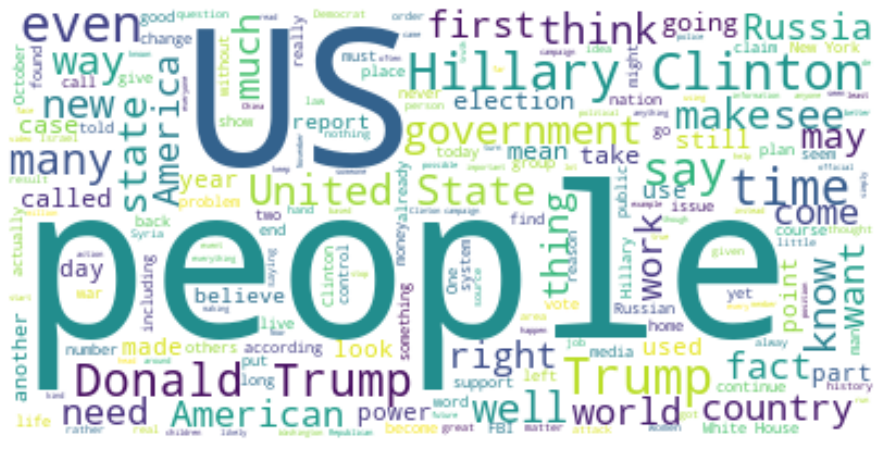

In [14]:
wordle.word_cloud(fake, "fake_wordle.png")